In [1]:
import pandas as pd
from sqlalchemy import create_engine
from functools import reduce
from credentials import user
from credentials import server
from credentials import password
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.ticker as ticker

from credentials import user, password, server

In [2]:
engine = create_engine("postgres+psycopg2://"+user+":"+password+"@"+server+"5432/covid_data")

In [3]:
service_requests_df = pd.read_csv('C:/Users/Natalia/Documents/NSS/class_projects/nashville-covid-quaranteam/data/hubNashville_311_Service_Requests.csv', low_memory=False)
clusters_df = pd.read_csv('C:/Users/Natalia/Documents/NSS/class_projects/nashville-covid-quaranteam/data/clusters.csv', low_memory=False)
businesses_df = pd.read_csv('C:/Users/Natalia/Documents/NSS/class_projects/nashville-covid-quaranteam/data/businesses.csv', low_memory=False)

In [4]:
service_requests_df.head(2)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,113016,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/30/2018 01:47:00 PM,03/05/2019 09:35:00 PM,Phone,NaN,NaN,...,False,NaN,False,2009 Upland Dr,NASHVILLE,7.0,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)"
1,53502,Closed,Property Violations,Residential Complaint,Residential Complaint,03/13/2018 09:34:50 PM,04/06/2018 01:13:32 PM,Phone,NaN,NaN,...,False,NaN,False,631 Murfreesboro Pike,NASHVILLE,17.0,37210,36.140070,-86.738360,"(36.14007, -86.73836)"


In [5]:
clusters_df.head(2)

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583


In [6]:
businesses_df.head(2)

,address,vicinity,name,type
0,"2440 COUCHVILLE PIKE, Nashville","2440 Couchville Pike, Nashville",Wilson Sporting Goods Co,"['point_of_interest', 'establishment']"
1,"1613 Buchanan St, Nashville","1613 Buchanan Street, Nashville",Coin Cloud Bitcoin ATM,"['atm', 'finance', 'point_of_interest', 'estab..."


In [7]:
service_requests_filtered = service_requests_df[['Request Type','Subrequest Type','Additional Subrequest Type','Date / Time Opened','Address', 'City','ZIP','Latitude','Longitude','Mapped Location']]
service_requests_filtered.head(2)

,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Address,City,ZIP,Latitude,Longitude,Mapped Location
0,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/30/2018 01:47:00 PM,2009 Upland Dr,NASHVILLE,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)"
1,Property Violations,Residential Complaint,Residential Complaint,03/13/2018 09:34:50 PM,631 Murfreesboro Pike,NASHVILLE,37210,36.140070,-86.738360,"(36.14007, -86.73836)"


In [8]:
service_requests_dropped_nan = service_requests_filtered.dropna()
service_requests_dropped_nan.head(2)

,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Address,City,ZIP,Latitude,Longitude,Mapped Location
0,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/30/2018 01:47:00 PM,2009 Upland Dr,NASHVILLE,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)"
1,Property Violations,Residential Complaint,Residential Complaint,03/13/2018 09:34:50 PM,631 Murfreesboro Pike,NASHVILLE,37210,36.140070,-86.738360,"(36.14007, -86.73836)"


In [9]:
service_requests_renamed = service_requests_dropped_nan.rename(columns={'Request Type':'req_type', 'Subrequest Type':'subreq_type','Additional Subrequest Type':'add_subreq_type','Date / Time Opened':'date_time','Address':'address','City':'city','ZIP':'zip','Latitude':'lat','Longitude':'long','Mapped Location':'mapped_loc'})
service_requests_renamed.head(2)

,req_type,subreq_type,add_subreq_type,date_time,address,city,zip,lat,long,mapped_loc
0,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/30/2018 01:47:00 PM,2009 Upland Dr,NASHVILLE,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)"
1,Property Violations,Residential Complaint,Residential Complaint,03/13/2018 09:34:50 PM,631 Murfreesboro Pike,NASHVILLE,37210,36.140070,-86.738360,"(36.14007, -86.73836)"


In [10]:
#covid_violations_renamed[['date','time']] = covid_violations_renamed.date_time.str.split(' ',expand=True)
service_requests_renamed['date'] = service_requests_renamed.date_time.str.split(' ', expand = True)[0]
service_requests_renamed['time'] = service_requests_renamed.date_time.str.split(' ', expand = True)[1]
service_requests_renamed ['AM/PM'] = service_requests_renamed.date_time.str.split(' ', expand = True)[2]
service_requests_renamed.head(2)

,req_type,subreq_type,add_subreq_type,date_time,address,city,zip,lat,long,mapped_loc,date,time,AM/PM
0,"Trash, Recycling & Litter",Cart Service,Trash - Request an Additional Cart,10/30/2018 01:47:00 PM,2009 Upland Dr,NASHVILLE,37216,36.198638,-86.706659,"(36.1986378, -86.7066586)",10/30/2018,01:47:00,PM
1,Property Violations,Residential Complaint,Residential Complaint,03/13/2018 09:34:50 PM,631 Murfreesboro Pike,NASHVILLE,37210,36.140070,-86.738360,"(36.14007, -86.73836)",03/13/2018,09:34:50,PM


In [11]:
##covid_violations_renamed['date'] = covid_violations_renamed.date_time.str.split().str[0]
##covid_violations_renamed.head(2)

In [12]:
covid_violations = service_requests_renamed[service_requests_renamed["req_type"]== 'COVID-19']
covid_violations = covid_violations.reset_index(drop=True)
covid_violations.head(2)

,req_type,subreq_type,add_subreq_type,date_time,address,city,zip,lat,long,mapped_loc,date,time,AM/PM
0,COVID-19,COVID-19 Violations,COVID-19 Violations,08/14/2020 02:38:00 AM,2045 Antioch Pike,ANTIOCH,37013,36.068546,-86.683898,"(36.0685457, -86.6838975)",08/14/2020,02:38:00,AM
1,COVID-19,COVID-19 Questions,COVID-19 Questions,06/18/2020 08:59:50 PM,Charlotte Pike,NASHVILLE,37209,36.114870,-86.925890,"(36.11487, -86.92589)",06/18/2020,08:59:50,PM


### Violations reported by subtype

In [13]:
covid_violations_sorted = covid_violations["subreq_type"].value_counts(sort=True)
covid_violations_sorted 

COVID-19 Violations                                           10791
COVID-19 Questions                                              366
COVID-19 Guidance for Reopening Businesses                       25
COVID-19 - Submit Input about The Plan to Reopen Nashville       16
Name: subreq_type, dtype: int64

### Violations reported by location

In [14]:
covid_violations_sorted_loc = covid_violations["city"].value_counts(sort=True)
covid_violations_sorted_loc

NASHVILLE         9077
MADISON            612
ANTIOCH            492
HERMITAGE          444
OLD HICKORY        217
GOODLETTSVILLE     217
BRENTWOOD           51
JOELTON             45
WHITES CREEK        28
LAVERGNE             9
NOLENSVILLE          5
LA VERGNE            1
Name: city, dtype: int64

In [15]:
covid_violations_addl_sorted = covid_violations["add_subreq_type"].value_counts(sort=True)
covid_violations_addl_sorted 

COVID-19 Violations                                           10791
COVID-19 Questions                                              366
COVID-19 Guidance for Reopening Businesses                       25
COVID-19 - Submit Input about The Plan to Reopen Nashville       16
Name: add_subreq_type, dtype: int64

In [16]:
print(covid_violations["date"].min())

03/20/2020


In [17]:
print(covid_violations["date"].max())

11/14/2020


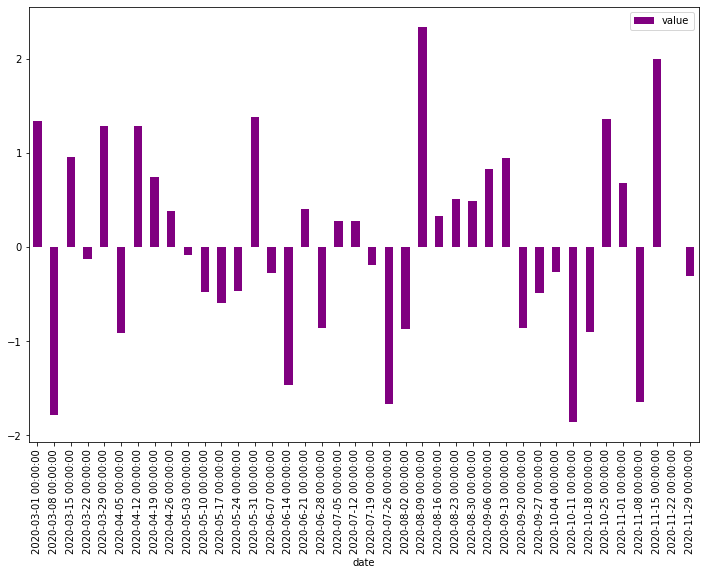

In [34]:
timeline = pd.date_range(start='2020, March', freq='W', periods=40)
covid_violations = pd.DataFrame({'date': timeline, 'value': np.random.randn(40)})
covid_violations.set_index('date', inplace=True)
covid_violations.plot(kind='bar', figsize=(12, 8), color='purple')
